In [1]:
import numpy as np
import pandas as pd

import time

import tensorflow_decision_forests as tfdf

2023-04-03 09:35:35.800901: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
'''
# load training data

train_starting_time = time.time()
train_df = pd.read_csv('../Data/jet_images_c16_pt0_jedinet_sort_hpT_pcNone_train.csv', nrows = 10000)
train_load_time = time.time()-train_starting_time
print(f'Loaded training sample of {len(train_df)} jets in {train_load_time:.3f}s')

# load testing data

test_starting_time = time.time()
test_df = pd.read_csv('../Data/jet_images_c16_pt0_jedinet_sort_hpT_pcNone_test.csv', nrows = 2500)
test_load_time = time.time()-test_starting_time
print(f'Loaded testing sample of {len(test_df)} jets in {test_load_time:.3f}s')
'''

"\n# load training data\n\ntrain_starting_time = time.time()\ntrain_df = pd.read_csv('../Data/jet_images_c16_pt0_jedinet_sort_hpT_pcNone_train.csv', nrows = 10000)\ntrain_load_time = time.time()-train_starting_time\nprint(f'Loaded training sample of {len(train_df)} jets in {train_load_time:.3f}s')\n\n# load testing data\n\ntest_starting_time = time.time()\ntest_df = pd.read_csv('../Data/jet_images_c16_pt0_jedinet_sort_hpT_pcNone_test.csv', nrows = 2500)\ntest_load_time = time.time()-test_starting_time\nprint(f'Loaded testing sample of {len(test_df)} jets in {test_load_time:.3f}s')\n"

In [3]:
def load_tfds(data_path: str, nrows_: int = None, name:str = None, label_: str = 'class'):
   start_time = time.time()
   df = pd.read_csv(data_path, nrows = nrows_)
   ds = tfdf.keras.pd_dataframe_to_tf_dataset(df, label=label_)
   load_time = time.time()-start_time

   if name is not None:
      print(f'Loaded {name} sample of {len(df)} jets in {load_time:.3f}s')

   return ds

In [4]:
train_ds = load_tfds('../Data/jet_images_c16_pt0_jedinet_sort_hpT_pcNone_train.csv', name='training', nrows_=1000)
test_ds = load_tfds('../Data/jet_images_c16_pt0_jedinet_sort_hpT_pcNone_test.csv', name='testing', nrows_=250)

2023-04-03 09:35:54.354195: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Loaded training sample of 1000 jets in 1.272s
Loaded testing sample of 250 jets in 0.595s


In [5]:
'''
df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
df_renamed = df.rename(columns={"A": "a", "B": "c"})
print(df)
print('\n-------\n')
print(df_renamed)
'''

'\ndf = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})\ndf_renamed = df.rename(columns={"A": "a", "B": "c"})\nprint(df)\nprint(\'\n-------\n\')\nprint(df_renamed)\n'

In [6]:
'''
for i in range(int((train_df.shape[1] - 1)/16)):
    train_df = train_df.rename(columns={f"c{i}_cos(theta)":f"c{i}_cos_theta", f"c{i}_cos(theta_rel)":f"c{i}_cos_theta_rel"})

for i in range(int((test_df.shape[1] - 1)/16)):
    test_df = test_df.rename(columns={f"c{i}_cos(theta)":f"c{i}_cos_theta", f"c{i}_cos(theta_rel)":f"c{i}_cos_theta_rel"})
'''    

'\nfor i in range(int((train_df.shape[1] - 1)/16)):\n    train_df = train_df.rename(columns={f"c{i}_cos(theta)":f"c{i}_cos_theta", f"c{i}_cos(theta_rel)":f"c{i}_cos_theta_rel"})\n\nfor i in range(int((test_df.shape[1] - 1)/16)):\n    test_df = test_df.rename(columns={f"c{i}_cos(theta)":f"c{i}_cos_theta", f"c{i}_cos(theta_rel)":f"c{i}_cos_theta_rel"})\n'

In [7]:
# train_ds['c0_cos_theta']

In [8]:
'''
# convert training and testing dataframes to tensorflow datasets
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label='class')
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label='class')
'''

"\n# convert training and testing dataframes to tensorflow datasets\ntrain_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label='class')\ntest_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label='class')\n"

In [9]:
BDT_hyperparameters={'num_trees':5,
             'shrinkage':0.2,
             'subsample':0.3,
             'use_hessian_gain':True,
             'growing_strategy':'BEST_FIRST_GLOBAL',
             'max_depth':-1,
             'max_num_nodes':32
            }

In [10]:
# define the model
model = tfdf.keras.GradientBoostedTreesModel(**BDT_hyperparameters)

Use /var/folders/w6/ywy355d53p1fqw8pn8ng6xn80000gn/T/tmpwdk908d6 as temporary training directory


In [11]:
#train the model
starting_time = time.time()
model.fit(train_ds, verbose = 1)
training_time = time.time() - starting_time

Reading training dataset...
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Training dataset read in 0:00:11.397169. Found 1000 examples.
Training model...


2023-04-03 09:36:08.249152: W external/ydf/yggdrasil_decision_forests/learner/gradient_boosted_trees/gradient_boosted_trees.cc:1790] "goss_alpha" set but "sampling_method" not equal to "GOSS".
2023-04-03 09:36:08.249180: W external/ydf/yggdrasil_decision_forests/learner/gradient_boosted_trees/gradient_boosted_trees.cc:1800] "goss_beta" set but "sampling_method" not equal to "GOSS".
2023-04-03 09:36:08.249192: W external/ydf/yggdrasil_decision_forests/learner/gradient_boosted_trees/gradient_boosted_trees.cc:1814] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
2023-04-03 09:36:08.272857: I external/ydf/yggdrasil_decision_forests/learner/gradient_boosted_trees/gradient_boosted_trees.cc:452] Default loss set to MULTINOMIAL_LOG_LIKELIHOOD
2023-04-03 09:36:08.274326: W external/ydf/yggdrasil_decision_forests/learner/gradient_boosted_trees/gradient_boosted_trees.cc:484] The model configuration specifies 5 trees but computation of the validation loss will o

Model trained in 0:00:04.384265
Compiling model...


2023-04-03 09:36:12.461994: I external/ydf/yggdrasil_decision_forests/learner/gradient_boosted_trees/gradient_boosted_trees.cc:1518] 	num-trees:5 train-loss:0.844832 train-accuracy:0.780065 valid-loss:1.295878 valid-accuracy:0.532468
2023-04-03 09:36:12.462175: I external/ydf/yggdrasil_decision_forests/learner/gradient_boosted_trees/gradient_boosted_trees.cc:1568] Create final snapshot of the model at iteration 5
2023-04-03 09:36:12.472427: I external/ydf/yggdrasil_decision_forests/learner/gradient_boosted_trees/gradient_boosted_trees.cc:242] Insufficient number of trees to apply early stopping. Using last loss for metrics.
2023-04-03 09:36:12.472456: I external/ydf/yggdrasil_decision_forests/learner/gradient_boosted_trees/gradient_boosted_trees.cc:309] Final model num-trees:0 valid-loss:1.295878 valid-accuracy:0.532468
[INFO 2023-04-03T09:36:12.553207+02:00 kernel.cc:1214] Loading model from path /var/folders/w6/ywy355d53p1fqw8pn8ng6xn80000gn/T/tmpwdk908d6/model/ with prefix dcc0e9ddf

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


In [13]:
model.GetVariableImportance()

AttributeError: 'GradientBoostedTreesModel' object has no attribute 'GetVariableImportance'

In [12]:
model.save('Models/BDT_name_test')

INFO:tensorflow:Assets written to: Models/BDT_name_test/assets


INFO:tensorflow:Assets written to: Models/BDT_name_test/assets


In [13]:
inspector = tfdf.inspector.make_inspector("Models/BDT_name_test/assets/")

In [14]:
inspector.variable_importances()['SUM_SCORE'][0][1]

63675.18042945862

In [15]:
feature_list_SUM_SCORE = [inspector.variable_importances()['SUM_SCORE'][i][0][0] for i in range(len(inspector.variable_importances()['SUM_SCORE']))]

In [16]:
feature_list_SUM_SCORE.index('c0_pT')

111

In [17]:
feature_list_SUM_SCORE[126]

'c5_Delta_R'

In [18]:
feature_labels = [
        "px",
        "py",
        "pz",
        "E",
        "E_rel",
        "pT",
        "pT_rel",
        "eta",
        "eta_rel",
        "eta_rot",
        "phi",
        "phi_rel",
        "phi_rot",
        "Delta_R",
        "cos_theta",
        "cos_theta_rel"
    ]

nb_constituents = 16

In [19]:
feature_rankings  = np.zeros((len(feature_labels), nb_constituents))

In [20]:
feature_rankings[:,0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [21]:
for feature_index in range(len(feature_labels)):
    for constituent_index in range(nb_constituents):
        try:
            score_index = feature_list_SUM_SCORE.index(f'c{constituent_index}_{feature_labels[feature_index]}')
            feature_rankings[feature_index][constituent_index] = inspector.variable_importances()['SUM_SCORE'][score_index][1]
            print(f'c{constituent_index}_{feature_labels[feature_index]} was found')

        except:
            print(f'c{constituent_index}_{feature_labels[feature_index]} was not found')
            continue


c0_px was found
c1_px was found
c2_px was not found
c3_px was not found
c4_px was found
c5_px was found
c6_px was found
c7_px was found
c8_px was not found
c9_px was found
c10_px was found
c11_px was found
c12_px was found
c13_px was found
c14_px was found
c15_px was found
c0_py was found
c1_py was found
c2_py was found
c3_py was found
c4_py was found
c5_py was found
c6_py was found
c7_py was found
c8_py was found
c9_py was not found
c10_py was found
c11_py was found
c12_py was not found
c13_py was found
c14_py was found
c15_py was found
c0_pz was found
c1_pz was found
c2_pz was not found
c3_pz was found
c4_pz was found
c5_pz was found
c6_pz was found
c7_pz was not found
c8_pz was not found
c9_pz was found
c10_pz was found
c11_pz was found
c12_pz was found
c13_pz was found
c14_pz was found
c15_pz was found
c0_E was found
c1_E was found
c2_E was found
c3_E was found
c4_E was found
c5_E was found
c6_E was found
c7_E was found
c8_E was found
c9_E was found
c10_E was found
c11_E was found


In [22]:
feature_rankings

array([[8.65782169e+03, 3.11295799e+03, 0.00000000e+00, 0.00000000e+00,
        7.34885964e+03, 8.78404578e+03, 1.44666000e+04, 5.23569614e+03,
        0.00000000e+00, 2.59249339e+03, 4.71054748e+02, 7.55777570e+02,
        1.83516396e+03, 7.37573841e+03, 7.70973068e+03, 4.43303663e+03],
       [7.62852346e+03, 1.22107887e+03, 6.73685708e+03, 7.43144369e+03,
        2.68362888e+03, 1.07296703e+03, 1.45218750e+03, 5.72287009e+02,
        9.69051623e+03, 0.00000000e+00, 1.78071905e+02, 1.31767034e+04,
        0.00000000e+00, 3.22716653e+03, 2.35223136e+03, 2.19022365e+03],
       [1.48930395e+03, 6.42380682e+02, 0.00000000e+00, 9.02931770e+02,
        1.01153030e+04, 3.39425155e+03, 1.75519733e+03, 0.00000000e+00,
        0.00000000e+00, 2.39414287e+02, 3.77983377e+03, 6.67755526e+02,
        1.10144693e+03, 5.47349558e+02, 4.49212839e+03, 4.53346201e+03],
       [4.74573671e+03, 2.91097798e+03, 5.53382775e+03, 1.00791603e+03,
        7.89801869e+03, 1.23697935e+03, 4.88633528e+03, 1.997

In [23]:
import matplotlib.pyplot as plt

In [24]:
plt.hist2d(feature_rankings)

TypeError: hist2d() missing 1 required positional argument: 'y'

In [25]:
import seaborn as sns

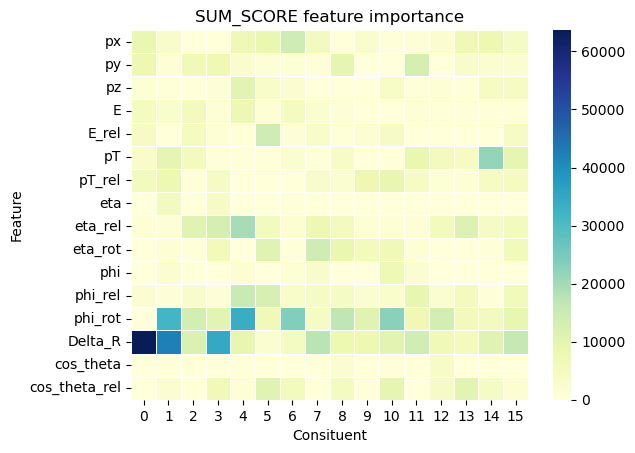

In [26]:
ax = sns.heatmap(feature_rankings, linewidth=0.5, cmap="YlGnBu", yticklabels = feature_labels)
ax.set(xlabel='Consituent', ylabel = 'Feature', title='SUM_SCORE feature importance')
plt.savefig('Plots/SUM_SCORE_test.pdf')
plt.show()

In [28]:
from prepare_data_BDT import select_feature_labels

select_feature_labels('jedinet')

['px',
 'py',
 'pz',
 'E',
 'E_rel',
 'pT',
 'pT_rel',
 'eta',
 'eta_rel',
 'eta_rot',
 'phi',
 'phi_rel',
 'phi_rot',
 'Delta_R',
 'cos_theta',
 'cos_theta_rel']

In [32]:
len(inspector.features())

256

In [35]:
type(feature_rankings)

numpy.ndarray

In [5]:
# model_path = "Models/BDT_name_test/"
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_decision_forests as tfdf
from prepare_data_BDT import select_feature_labels
import seaborn as sns

def get_2d_importances(model_path: str, variable_importance:str, feature_choice: str = 'jedinet') -> np.ndarray:
    feature_list = select_feature_labels(feature_choice)

    inspector_path = os.path.join(model_path, "assets")
    inspector = tfdf.inspector.make_inspector(inspector_path)

    nb_features = len(feature_list)
    # print(f'features per constituent: {nb_features}')
    nb_constituents = int(len(inspector.features())/nb_features)
    # print(f'total features: {len(inspector.features())}')
    # print(f'constituents per jet: {nb_constituents}')
    
    feature_importance_dict = {i[0][0]: i[1] for i in inspector.variable_importances()[variable_importance]}

    feature_importances  = np.zeros((nb_features, nb_constituents))
    for feature_index in range(nb_features):
        for constituent_index in range(nb_constituents):
            try:
                feature_importances[feature_index][constituent_index] = feature_importance_dict[f'c{constituent_index}_{feature_list[feature_index]}']
                # print(f'c{constituent_index}_{feature_list[feature_index]} was found')

            except:
                # print(f'c{constituent_index}_{feature_list[feature_index]} was not found')
                continue
    
    return feature_importances

def plot_importances(model_path: str, variable_importance:str, feature_choice: str = 'jedinet', cmap: str = "YlGnBu",
                     save_fig: bool = False, fig_name:str = '', fig_directory:str = 'Plots', show_fig:bool = False):
    feature_importances = get_2d_importances(model_path, variable_importance, feature_choice = feature_choice)

    ax = sns.heatmap(feature_importances, linewidth=0.5, cmap=cmap, yticklabels = select_feature_labels(feature_choice), square = True)
    ax.set(xlabel='Consituent', ylabel = 'Feature', title=f'{variable_importance} feature importance')
    # plt.tight_layout()
    if save_fig:
        savepath = os.path.join(fig_directory, f"{variable_importance}_{fig_name}.pdf")
        plt.savefig(savepath)
    if show_fig:
        plt.show()
    
    plt.close()
    

INV_MEAN_MIN_DEPTH


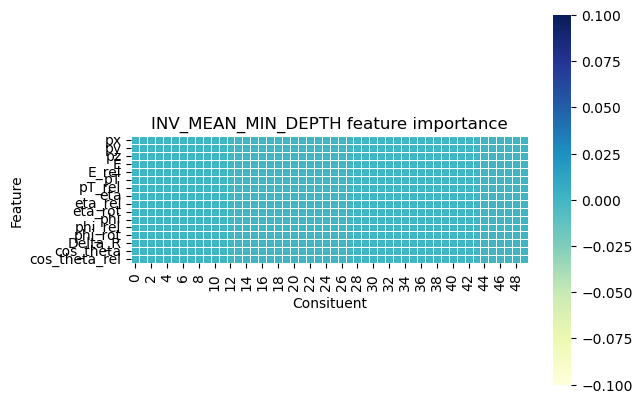

NUM_AS_ROOT


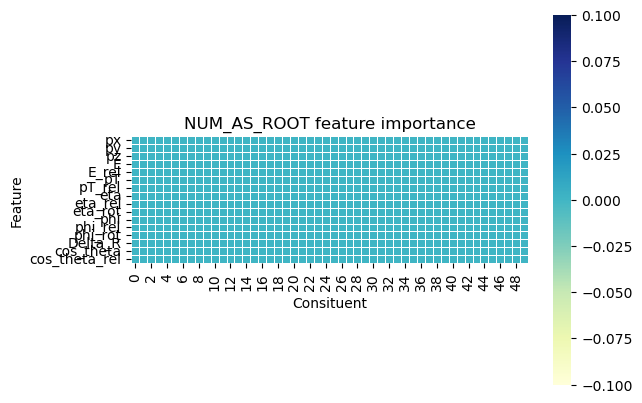

NUM_NODES


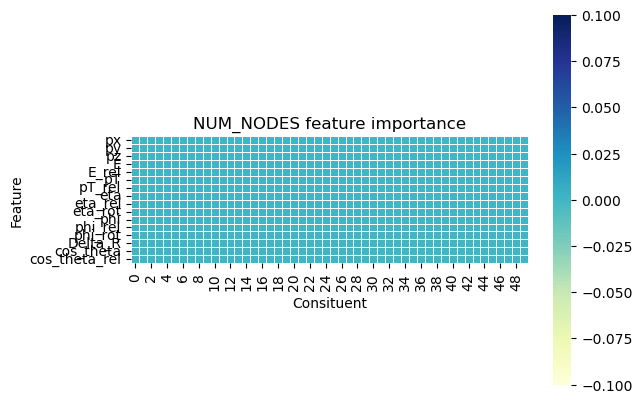

SUM_SCORE


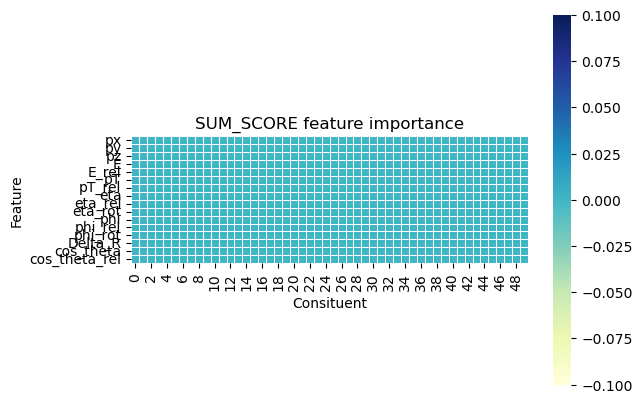

In [6]:
importances  = ['INV_MEAN_MIN_DEPTH', 'NUM_AS_ROOT', 'NUM_NODES', 'SUM_SCORE']

for importance in importances:
    print(importance)
    plot_importances("/Users/andrewoliver/Documents/HEP Masters/ETH/Masters Project/Testing/Models/model_initial_c50_pt2.0_jedinet", 
                     importance, show_fig = True,
                     save_fig = False, fig_name = "test")

In [7]:
new_inspector = tfdf.inspector.make_inspector("Models/BDT_name_test/assets/")
feature_list_SUM_SCORE = [new_inspector.variable_importances()['SUM_SCORE'][i][0][0] for i in range(len(new_inspector.variable_importances()['SUM_SCORE']))]
feature_list_SUM_SCORE.index('c0_pT')

111

In [29]:
alt_list_SUM_SCORE = [i[0][0] for i in new_inspector.variable_importances()['SUM_SCORE']]
# alt_list_SUM_SCORE[111]

In [30]:
SUM_SCORE_dict = {i[0][0]: i[1] for i in new_inspector.variable_importances()['SUM_SCORE']}
print(SUM_SCORE_dict)

{'c0_Delta_R': 63675.18042945862, 'c1_Delta_R': 42445.48713970184, 'c3_Delta_R': 34764.43838119507, 'c4_phi_rot': 33587.72777366638, 'c1_phi_rot': 31638.207044124603, 'c6_phi_rot': 23876.580218553543, 'c10_phi_rot': 22852.295475006104, 'c14_pT': 21677.209259986877, 'c4_eta_rel': 19517.460788726807, 'c7_Delta_R': 17199.91233062744, 'c8_phi_rot': 16892.59173297882, 'c15_Delta_R': 15932.093589782715, 'c4_phi_rel': 15252.305397033691, 'c5_E_rel': 14579.448732376099, 'c7_eta_rot': 14548.131271958351, 'c6_px': 14466.60004234314, 'c11_Delta_R': 14140.143162727356, 'c2_phi_rot': 13674.180543899536, 'c12_phi_rot': 13652.91135597229, 'c11_py': 13176.703435897827, 'c3_eta_rel': 12936.484847068787, 'c5_phi_rel': 12755.391427993774, 'c2_Delta_R': 11871.460938692093, 'c13_eta_rel': 11236.229035377502, 'c14_Delta_R': 10941.187519073486, 'c5_eta_rot': 10694.060084342957, 'c5_cos_theta_rel': 10605.850169181824, 'c9_phi_rot': 10513.597823143005, 'c2_eta_rel': 10507.192639827728, 'c13_cos_theta_rel': 104

In [31]:
SUM_SCORE_dict['c0_pT']

3389.6413745880127

In [28]:
new_inspector.variable_importances()['SUM_SCORE']

[("c0_Delta_R" (1; #1), 63675.18042945862),
 ("c1_Delta_R" (1; #113), 42445.48713970184),
 ("c3_Delta_R" (1; #145), 34764.43838119507),
 ("c4_phi_rot" (1; #173), 33587.72777366638),
 ("c1_phi_rot" (1; #125), 31638.207044124603),
 ("c6_phi_rot" (1; #205), 23876.580218553543),
 ("c10_phi_rot" (1; #29), 22852.295475006104),
 ("c14_pT" (1; #89), 21677.209259986877),
 ("c4_eta_rel" (1; #167), 19517.460788726807),
 ("c7_Delta_R" (1; #209), 17199.91233062744),
 ("c8_phi_rot" (1; #237), 16892.59173297882),
 ("c15_Delta_R" (1; #97), 15932.093589782715),
 ("c4_phi_rel" (1; #172), 15252.305397033691),
 ("c5_E_rel" (1; #179), 14579.448732376099),
 ("c7_eta_rot" (1; #216), 14548.131271958351),
 ("c6_px" (1; #206), 14466.60004234314),
 ("c11_Delta_R" (1; #33), 14140.143162727356),
 ("c2_phi_rot" (1; #141), 13674.180543899536),
 ("c12_phi_rot" (1; #61), 13652.91135597229),
 ("c11_py" (1; #47), 13176.703435897827),
 ("c3_eta_rel" (1; #151), 12936.484847068787),
 ("c5_phi_rel" (1; #188), 12755.39142799